# Predicting Himalayan Expedition Success - Machine Learning
***
### Further Cleaning

## Introduction

The Himalayan Database ©, consists of records for all expeditions in the Nepal Himalayas from 1905 through 2018. The database covers expeditions to more than 450 significant peaks, including Everest, Cho Oyu and Kangchenjunga. The database is published by The Himalayan Database ©, a non-profit organization. For more information go to http://himalayandatabase.com/index.html.



### Datasets
Three datasets peaks.csv, expeditions.csv and members.csv have already been cleaned and joined into DF_Himalayas_Expeditions.csv for further visual analysis. 

This dataset is now loaded into a DataFrame for statistical analysis.

### Outcome

As a reminder, the data will be used to predict a member's success of a summitting a certain peak, during a certain time of year, with certain support mechanisms.  

## 1. Packages and setup

In [844]:
%matplotlib inline
import pandas as pd
import numpy as np

In [845]:
# Set workspace
pd.set_option('display.max_columns', 500)
# Set output charackters to 110 (not 79)
pd.options.display.width = 110
# To give multiple cell output. Not just the last command.
#InteractiveShell.ast_node_interactivity = 'last'

## 2. Load into DataFrame & further cleaning

In [846]:
# Load data as 'df'
df = pd.read_csv('DF_Himalayas_Expeditions.csv')
print('Shape:', df.shape)

Shape: (65315, 66)


In [847]:
df.columns

Index(['expid', 'peakid', 'sex', 'calcage', 'citizen', 'status', 'residence', 'occupation', 'leader',
       'deputy', 'bconly', 'disabled', 'hired', 'sherpa', 'tibetan', 'msuccess', 'msolo', 'mtraverse',
       'mski', 'mparapente', 'mspeed', 'mo2used', 'mo2none', 'mo2climb', 'mo2descent', 'mo2sleep',
       'mo2medical', 'msmtterm', 'stdrte', 'year', 'season', 'host', 'route1', 'nation', 'leaders',
       'termreason', 'traverse', 'ski', 'parapente', 'camps', 'rope', 'totmembers', 'smtmembers', 'mdeaths',
       'tothired', 'smthired', 'hdeaths', 'nohired', 'o2used', 'o2none', 'o2climb', 'o2descent', 'o2sleep',
       'o2medical', 'agency', 'comrte', 'xpd_success', 'smtmonth', 'heightm', 'himal', 'region', 'open',
       'unlisted', 'phost', 'pstatus', 'pyear'],
      dtype='object')

The output features not required for this model are:  
- 'msmtterm' describes the reason for not reaching the summit. This is more descriptive output, labeled data, and cannot be used now. This can be revisited later for multiple category labels.
- 'termreason' must be dropped for the same reason as above.
- 'smtmembers' describes how many members in an expedition summitted. This is output information.
- 'mdeaths' must be dropped for the same reason as above.
- 'smthired' describes how many members that were 'hired help' summitted. This is output information.
- 'hdeaths' describes deaths of members that were 'hired help'. This is output information.
- 'xpd_success' describes success of the expedition. This is output information.  
  
Other features not required initially:
- 'peakid'; there are 352 peaks. This makes for a large categorical set. This feature will be introduced later in the working model.
- 'expid', or the name of the expedition is not neccesary for training.

  
These output features can be used later to train the data to answer different questions. 

In [848]:
# Drop the other output features described above
col = ['msmtterm', 'termreason', 'smtmembers', 'mdeaths', 'smthired', 'hdeaths', 'xpd_success', 'peakid', 'expid']
df.drop(col, inplace=True, axis=1, errors='ignore')

In [849]:
df.shape

(65315, 57)

In [850]:
# Review the non-binary features
# Select the columns of non-binary features
non_bin_cols = ['sex', 'calcage', 'citizen', 'status', 'residence', 'occupation', 'route1', 
       'nation', 'leaders', 'agency']

# Show the number of unique values for each non-binary feature
pd.DataFrame([(col, len(df[col].value_counts())) for col in non_bin_cols], columns=['feature', 'uniquevalues'])

,feature,uniquevalues
0,sex,2
1,calcage,77
2,citizen,180
3,status,505
4,residence,228
5,occupation,14875
6,route1,1292
7,nation,78
8,leaders,4993
9,agency,1392


The number of unique values for some features are too many. For example citizen, residence and nation contain too many unique values. We will narrow this down at the cost of losing some data.  

To recap:  
Nation    - Principle nationality of the expedition.  
Citizen   - Citizenship of member. (We can keep the top 50 countries only as that will keep 64704/65315 ~ 99% of the data)  
Residence - Country of residence of member.

(I tried to write a function to replicate the following 3 cells, but I couldn't get it to update the DF)

In [851]:
# Only pick top 50 values for countries 'citizen'
# Number of data points if we keep the top n_val appearing countries only
perc_affected = (len(df) - df['citizen'].value_counts().values[:50].sum()) / len(df) * 100
print('Data points for 50 categories for citizen reducing by {:0.2f}'.format(perc_affected),'%')
# Drop the data points we don't need
keep_values = df['citizen'].value_counts()[:50].index
# Change these values we don't need to zero
df['citizen'] = df['citizen'].apply(lambda x: x if x in keep_values else 0)
df = df[df['citizen'] != 0]  

Data points for 50 categories for citizen reducing by 0.94 %


In [852]:
# Only pick top 50 values for countries 'nation'
# Number of data points if we keep the top n_val appearing countries only
perc_affected = (len(df) - df['nation'].value_counts().values[:50].sum()) / len(df) * 100
print('Data points for 50 categories for nation reducing by {:0.2f}'.format(perc_affected),'%')
# Drop the data points we don't need
keep_values = df['nation'].value_counts()[:50].index
# Change these values we don't need to zero
df['nation'] = df['nation'].apply(lambda x: x if x in keep_values else 0)
df = df[df['nation'] != 0]  

Data points for 50 categories for nation reducing by 0.18 %


In [853]:
# Only pick top 50 values for countries 'residence'
# Number of data points if we keep the top n_val appearing countries only
perc_affected = (len(df) - df['residence'].value_counts().values[:50].sum()) / len(df) * 100
print('Data points for 50 categories residence reducing by {:0.2f}'.format(perc_affected),'%')
# Drop the data points we don't need
keep_values = df['residence'].value_counts()[:50].index
# Change these values we don't need to zero
df['residence'] = df['residence'].apply(lambda x: x if x in keep_values else 0)
df = df[df['residence'] != 0]  

Data points for 50 categories residence reducing by 1.00 %


In [854]:
# Only pick top 40 values for 'status'
# Number of data points if we keep the top n_val appearing only
perc_affected = (len(df) - df['status'].value_counts().values[:40].sum()) / len(df) * 100
print('Data points for 40 categories for status reducing by {:0.2f}'.format(perc_affected),'%')
# Drop the data points we don't need
keep_values = df['status'].value_counts()[:50].index
# Change these values we don't need to zero
df['status'] = df['status'].apply(lambda x: x if x in keep_values else 0)
df = df[df['status'] != 0]  

Data points for 40 categories for status reducing by 1.48 %


In [855]:
# Only pick top n values for 'occupation'
# Number of data points if we keep the top n_val appearing only
perc_affected = (len(df) - df['occupation'].value_counts().values[:500].sum()) / len(df) * 100
print('Data points for 500 categories for occupation reducing by {:0.2f}'.format(perc_affected),'%')

# Drop 'occupation'. See explanation below
df.drop('occupation', inplace=True, axis=1, errors='ignore')

Data points for 500 categories for occupation reducing by 49.57 %


There are too many categories for 'occupation' as it is. Even if 500 categories are selected, we still lose 50% of the data. This feature will be revisited with NLTK later. For now it will be dropped, unfortunately.

In [856]:
# Only pick top 50 values for 'route1'
# Number of data points if we keep the top n_val appearing only
perc_affected = (len(df) - df['route1'].value_counts().values[:50].sum()) / len(df) * 100
print('Data points for 50 categories for route1 reducing by {:0.2f}'.format(perc_affected),'%')

# Drop 'route1'. See explanation below
df.drop('route1', inplace=True, axis=1, errors='ignore')

Data points for 50 categories for route1 reducing by 19.73 %


There are too many categories for 'route1' as it is. For now it will be dropped, unfortunately.

In [857]:
# Only pick top 500 values for 'leaders'
# Number of data points if we keep the top n_val appearing only
perc_affected = (len(df) - df['leaders'].value_counts().values[:500].sum()) / len(df) * 100
print('Data points for 500 categories for leaders reducing by {:0.2f}'.format(perc_affected),'%')

# Drop 'leaders'. See explanation below
df.drop('leaders', inplace=True, axis=1, errors='ignore')

Data points for 500 categories for leaders reducing by 53.23 %


There are too many categories for 'leaders' as it is. For now it will be dropped, unfortunately.

In [858]:
# Only pick top 100 values for 'agency'
# Number of data points if we keep the top n_val appearing only
perc_affected = (len(df) - df['agency'].value_counts().values[:100].sum()) / len(df) * 100
print('Data points for 100 categories for agency reducing by {:0.2f}'.format(perc_affected),'%')

# Drop 'agency'. See explanation below
df.drop('agency', inplace=True, axis=1, errors='ignore')

Data points for 100 categories for agency reducing by 30.24 %


There are too many categories for 'agency' as it is. For now it will be dropped, for the first model attempt, but will be reintroduced.

In [859]:
df.drop(['citizen', 'residence'], inplace=True, axis=1)

In [860]:
# Now review the non-binary features again
# Select the columns of non-binary features
non_bin_cols = ['sex', 'calcage', 'status', 'nation']

# Show the number of unique values for each non-binary feature
pd.DataFrame([(col, len(df[col].value_counts())) for col in non_bin_cols], columns=['feature', 'uniquevalues'])

,feature,uniquevalues
0,sex,2
1,calcage,77
2,status,50
3,nation,50


Now the remaining features need to be adapted. For the following features:  
- sex: Convert male/female to a value 1, if male, 0 if female.
- calcage: Stays the same.
- status and nation: Apply pd.get_dummies()

In [861]:
# Adapt 'sex' to new binary feature 'sex_male'
print(df.sex.value_counts())
df['sex_male'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)
print(df['sex_male'].value_counts())
# Drop 'sex'
df.drop('sex', inplace=True, axis=1)

M    57535
F     5579
Name: sex, dtype: int64
1    57535
0     5579
Name: sex_male, dtype: int64


## 3. Convert cyclical features

There are 2 features that need t be converted to compensate for it's cyclical nature. 'smtmonth' and 'season'.

### 3.1 Summit month

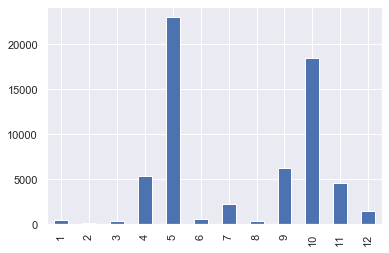

In [862]:
# Review 'smtmonth' distribution
df['smtmonth'].value_counts().sort_index().plot(kind='bar')

The graph below represent the cyclical nature of the month of the year. 

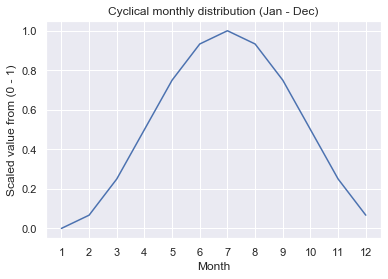

In [863]:
# Monthly range from 1 - 12 ('x1')
x1 = np.arange(1, 13)

# Scale: Adjusted trig range 0 - 2.pi ('x2')
x2 = (1/6)*np.pi*(x1 - 1)

# Adjusted sine function to approcimate the anual cycle
y = lambda x: 1/2 * (np.sin((x-np.pi/2)) + 1)

# Plot
_ = plt.plot(x2, y(x2))
_ = plt.xticks(x2, np.arange(1,13))
_ = plt.title('Cyclical monthly distribution (Jan - Dec)')
_ = plt.xlabel('Month')
_ = plt.ylabel('Scaled value from (0 - 1)')

Note: January and December does not, and should not, overlap. So the month 1 and month 13, if there was one, will have the same scaled value.

In [864]:
def scale_month_cycl(month):
    '''Function to use in .apply to scale month value into trig equivalent'''

    # Scale: Adjusted trig range 0 - 2.pi
    x = (1/6)*np.pi*(month - 1)
    
    # Adjusted sine function to approcimate the anual cycle
    y = lambda x: 1/2 * (np.sin((x-np.pi/2)) + 1)

    return y(x)

In [865]:
# Convert 'smtmonth' to cyclical
df['smtmonth'] = df['smtmonth'].apply(lambda x: scale_month_cycl(x))

In [866]:
# Review
df['smtmonth'].value_counts().sort_index()

0.000000      456
0.066987      136
0.066987     1396
0.250000      298
0.250000     4549
0.500000     5394
0.500000    18484
0.750000    23011
0.750000     6251
0.933013      556
0.933013      312
1.000000     2271
Name: smtmonth, dtype: int64

### 3.2 Seaon

In [867]:
# Review 'season'
df['season'].value_counts()

3    30241
1    30190
4     1993
2      689
0        1
Name: season, dtype: int64

In [868]:
# 1 data point has zero as a season. Delete this row
df = df[df['season'] != 0]

# Review 'season'
df['season'].value_counts()

3    30241
1    30190
4     1993
2      689
Name: season, dtype: int64

In [869]:
def scale_season_cycl(season):
    '''Function to use in .apply to scale season value into trig equivalent'''

    # Scale: Adjusted trig range 0 - 2.pi
    x = (1/2)*np.pi*(season - 1)
    
    # Adjusted sine function to approcimate the anual cycle
    y = lambda x: 1/2 * (np.sin((x-np.pi/2)) + 1)

    return y(x)

In [870]:
# Convert 'smtmonth' to cyclical
df['season'] = df['season'].apply(lambda x: scale_season_cycl(x))

In [871]:
# Review
df['season'].value_counts().sort_index()

0.0    30190
0.5      689
0.5     1993
1.0    30241
Name: season, dtype: int64

## 4. Convert categorical features to binary-pivot

The 2 features 'status' and 'nation' must be converted with pd.get_dummies()

In [872]:
df = pd.get_dummies(df, prefix=['status', 'nation'], columns=['status', 'nation'])

## 5. Save data

Save data to output file DF_Himalayas_Expeditions_MLready.csv.

In [873]:
# Save completed DataFrame 
df.to_csv('DF_Himalayas_Expeditions_MLready.csv', index=False)